In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import matplotlib
%matplotlib inline 
matplotlib.style.use('ggplot')

In [6]:
data = pd.read_csv('reformed_assessors_data.csv', index_col='id')
data.columns = range(1,18)
with open('names.json', 'r') as f:
    names = json.load(f)
for key in names.keys():
    names[key] = dict(zip(names[key].values(), names[key].keys()))
features = {1: 'score for test', 2: 'open questions', 3: 'test for N and S', 4: 'sex', 5: 'year of birth', 
            6: 'education', 7: 'speciality', 8: 'job', 9: 'attempts', 10: 'impression admin', 11: 'source', 
            12: 'recruit', 13: 'Gset exam accuracy', 14: '% Gset exam', 15: 'Gset training accuracy', 
            16: 'time spent on training', 17: 'time spent on exam'}

In [7]:
print(names)

{'7': {0: 'биолог', 1: 'географ', 2: 'другое', 3: 'искусство', 4: 'история', 5: 'медицина', 6: 'педагог', 7: 'психолог', 8: 'среднее', 9: 'техн/комп', 10: 'физ-мат', 11: 'филолог', 12: 'философ', 13: 'химик', 14: 'экон', 15: 'юр'}, '4': {0: 'ж', 1: 'м'}, '10': {0: 'негативное', 1: 'положительное'}, '3': {0: 'да', 1: 'нет'}, '2': {0: 'плохие', 1: 'средние', 2: 'хорошие'}, '11': {0: 'из поиска', 1: 'по рекоменации'}, '8': {0: 'бухгалтер', 1: 'военный', 2: 'госслужащий', 3: 'декрет', 4: 'другое', 5: 'журналистика', 6: 'инф.технологии/программист', 7: 'культура', 8: 'медицина', 9: 'менеджер', 10: 'неопределенный', 11: 'переводчик', 12: 'преподаватель', 13: 'промышленность', 14: 'свой бизнес', 15: 'сфера услуг', 16: 'торговля', 17: 'фин,банк,страх', 18: 'юрист'}, '12': {0: 'да', 1: 'нет'}, '6': {0: 'высш', 1: 'спец', 2: 'сред', 3: 'степень', 4: 'студент'}}


In [10]:
def show_dependence(feature):
    df = data[[feature, 12]]
    yes = df.loc[df[12] == 0].groupby([feature]).count()
    no = df.loc[df[12] == 1].groupby([feature]).count()
    no.columns = ['no']
    yes.columns = ['yes']
    res = no.join(yes, how='outer')
    return res

def proc_recruited(data):
    data = data.applymap(lambda x: x if x >0 else 0)
    proc = {}
    for i in data.index:
        proc[i] = int((data['yes'][float(i)]/(data['yes'][float(i)] + data['no'][float(i)]))*100 //1)
    return(proc)

### Dependence of target on features:

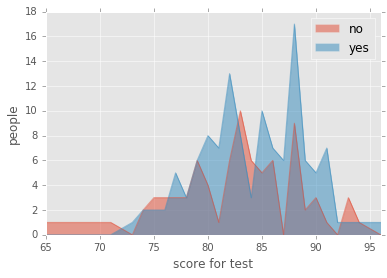

In [11]:
res = show_dependence(1)
res.plot.area(stacked=False)
plt.xlabel(features[1])
plt.ylabel('people')

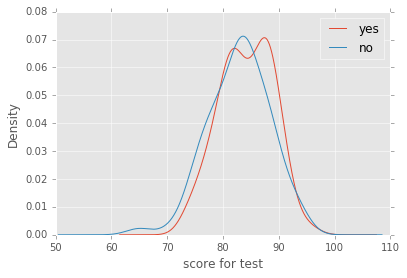

In [13]:
data.loc[data[12] == 0][1].plot(kind='kde', legend=True)
data.loc[data[12] == 1][1].plot(kind='kde', legend=True)
L=plt.legend()
L.get_texts()[0].set_text('yes')
L.get_texts()[1].set_text('no')
plt.xlabel(features[1])

{0: 'плохие', 1: 'средние', 2: 'хорошие'}
percentage recruited: {0.0: 55, 1.0: 58, 2.0: 64}


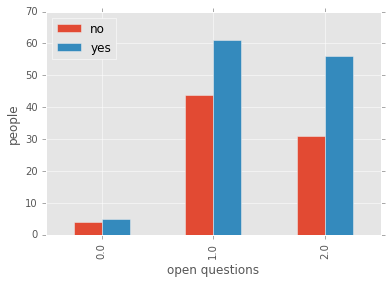

In [14]:
res = show_dependence(2)
res.plot.bar()
plt.xlabel(features[2])
plt.ylabel('people')
print(names['2'])
print('percentage recruited:', proc_recruited(res))

{0: 'да', 1: 'нет'}
percentage recruited: {0.0: 63, 1.0: 60}


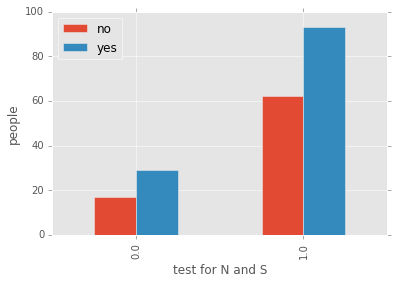

In [15]:
res = show_dependence(3)
res.plot.bar()
plt.xlabel(features[3])
plt.ylabel('people')
print(names['3'])
print('percentage recruited:', proc_recruited(res))

{0: 'ж', 1: 'м'}
percentage recruited: {0.0: 60, 1.0: 61}


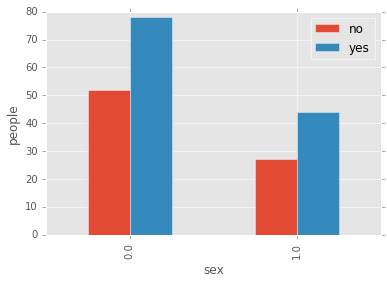

In [16]:
res = show_dependence(4)
res.plot.bar()
plt.xlabel(features[4])
plt.ylabel('people')
print(names['4'])
print('percentage recruited:', proc_recruited(res))

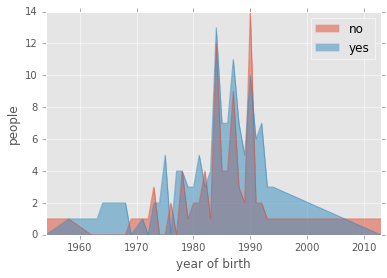

In [17]:
res = show_dependence(5)
res.plot.area(stacked=False)
plt.xlabel(features[5])
plt.ylabel('people')

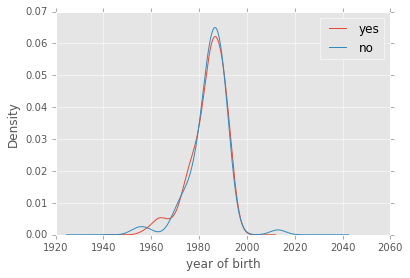

In [19]:
data.loc[data[12] == 0][5].plot(kind='kde', legend=True)
data.loc[data[12] == 1][5].plot(kind='kde', legend=True)
L=plt.legend()
L.get_texts()[0].set_text('yes')
L.get_texts()[1].set_text('no')
plt.xlabel(features[5])

{0: 'высш', 1: 'спец', 2: 'сред', 3: 'степень', 4: 'студент'}
percentage recruited: {0.0: 60, 1.0: 100, 2.0: 40, 3.0: 50, 4.0: 61}


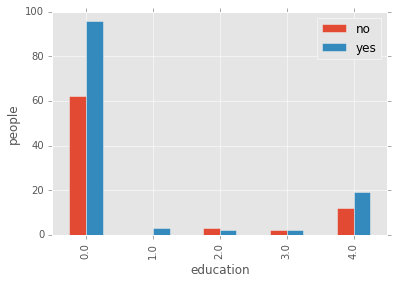

In [20]:
res = show_dependence(6)
res.plot.bar()
plt.xlabel(features[6])
plt.ylabel('people')
print(names['6'])
print('percentage recruited:', proc_recruited(res))

{0: 'биолог', 1: 'географ', 2: 'другое', 3: 'искусство', 4: 'история', 5: 'медицина', 6: 'педагог', 7: 'психолог', 8: 'среднее', 9: 'техн/комп', 10: 'физ-мат', 11: 'филолог', 12: 'философ', 13: 'химик', 14: 'экон', 15: 'юр'}
percentage recruited: {0.0: 60, 1.0: 60, 2.0: 50, 3.0: 75, 4.0: 50, 5.0: 60, 6.0: 80, 7.0: 80, 8.0: 50, 9.0: 64, 10.0: 77, 11.0: 54, 12.0: 100, 13.0: 0, 14.0: 63, 15.0: 25}


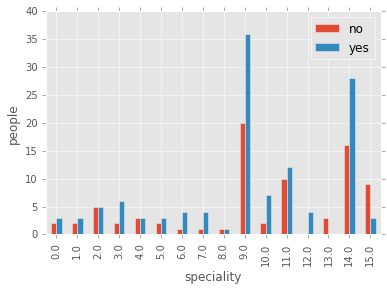

In [21]:
res = show_dependence(7)
res.plot.bar()
plt.xlabel(features[7])
plt.ylabel('people')
print(names['7'])
print('percentage recruited:', proc_recruited(res))

{0: 'бухгалтер', 1: 'военный', 2: 'госслужащий', 3: 'декрет', 4: 'другое', 5: 'журналистика', 6: 'инф.технологии/программист', 7: 'культура', 8: 'медицина', 9: 'менеджер', 10: 'неопределенный', 11: 'переводчик', 12: 'преподаватель', 13: 'промышленность', 14: 'свой бизнес', 15: 'сфера услуг', 16: 'торговля', 17: 'фин,банк,страх', 18: 'юрист'}
percentage recruited: {0.0: 100, 1.0: 100, 2.0: 62, 3.0: 57, 4.0: 55, 5.0: 0, 6.0: 62, 7.0: 71, 8.0: 66, 9.0: 44, 10.0: 78, 11.0: 33, 12.0: 52, 13.0: 100, 14.0: 50, 15.0: 36, 16.0: 83, 17.0: 69, 18.0: 0}


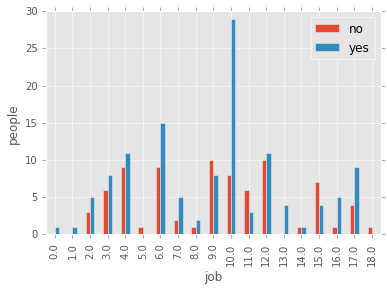

In [22]:
res = show_dependence(8)
res.plot.bar()
plt.xlabel(features[8])
plt.ylabel('people')
print(names['8'])
print('percentage recruited:', proc_recruited(res))

percentage recruited: {1.0: 62, 2.0: 60, 3.0: 0, 4.0: 0, 5.0: 50, 6.0: 50}


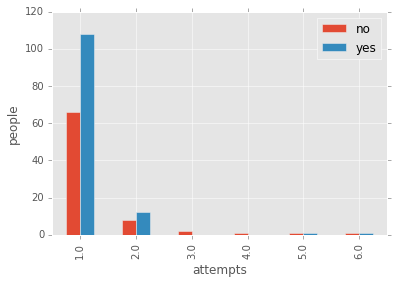

In [23]:
res = show_dependence(9)
res.plot.bar()
plt.xlabel(features[9])
plt.ylabel('people')
print('percentage recruited:', proc_recruited(res))

{0: 'негативное', 1: 'положительное'}
percentage recruited: {0.0: 40, 1.0: 65}


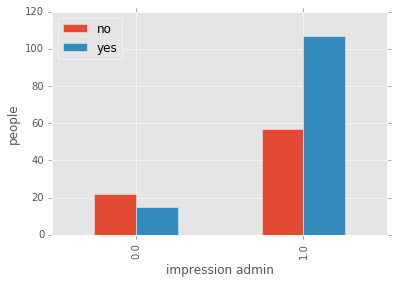

In [24]:
res = show_dependence(10)
res.plot.bar()
plt.xlabel(features[10])
plt.ylabel('people')
print(names['10'])
print('percentage recruited:', proc_recruited(res))

{0: 'из поиска', 1: 'по рекоменации'}
percentage recruited: {0.0: 68, 1.0: 59}


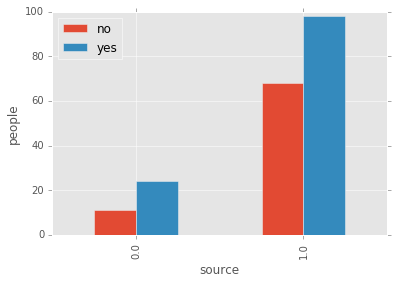

In [25]:
res = show_dependence(11)
res.plot.bar()
plt.xlabel(features[11])
plt.ylabel('people')
print(names['11'])
print('percentage recruited:', proc_recruited(res))

{0: 'да', 1: 'нет'}


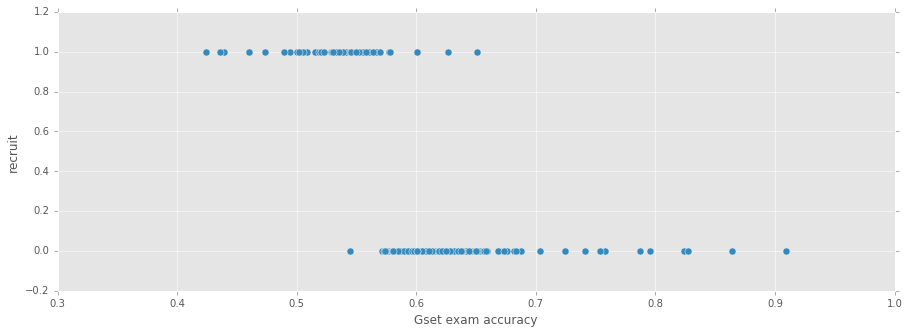

In [26]:
data.plot.scatter(x=13, y=12, figsize=(15,5), fontsize=10, s=50)
plt.xlabel(features[13])
plt.ylabel('recruit')
print(names['12'])

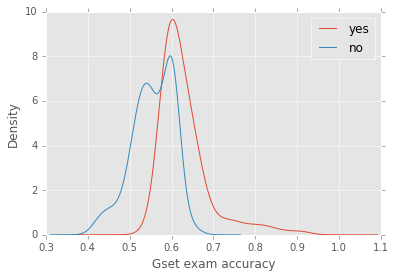

In [28]:
data.loc[data[12] == 0][13].plot(kind='kde', legend=True)
data.loc[data[12] == 1][13].plot(kind='kde', legend=True)
L=plt.legend()
L.get_texts()[0].set_text('yes')
L.get_texts()[1].set_text('no')
plt.xlabel(features[13])

{0: 'да', 1: 'нет'}


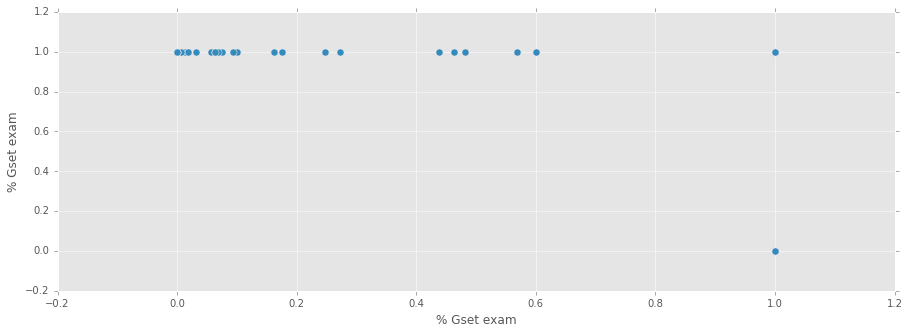

In [29]:
data.plot.scatter(x=14, y=12, figsize=(15,5), fontsize=10, s=50)
plt.xlabel('% Gset exam')
plt.ylabel(features[14])
print(names['12'])

{0: 'да', 1: 'нет'}


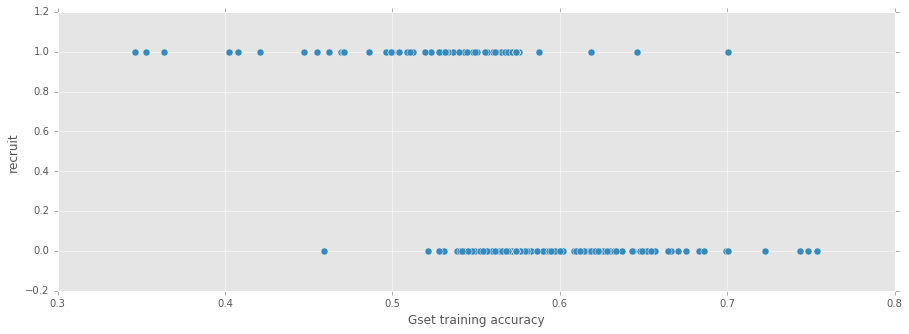

In [30]:
data.plot.scatter(x=15, y=12, figsize=(15,5), fontsize=10, s=50)
plt.xlabel(features[15])
plt.ylabel(features[12])
print(names['12'])

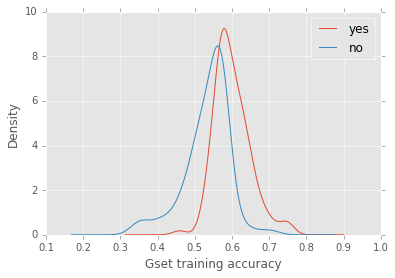

In [32]:
data.loc[data[12] == 0][15].plot(kind='kde', legend=True)
data.loc[data[12] == 1][15].plot(kind='kde', legend=True)
L=plt.legend()
L.get_texts()[0].set_text('yes')
L.get_texts()[1].set_text('no')
plt.xlabel(features[15])

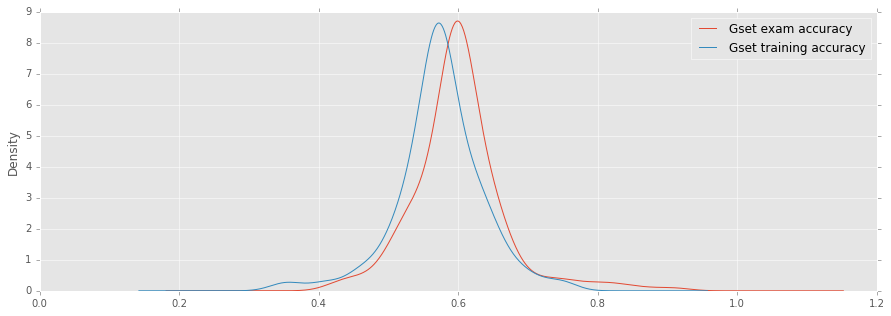

In [33]:
data[13].plot(kind='kde', legend=True, figsize=(15,5), fontsize=10,)
data[15].plot(kind='kde', legend=True)
L=plt.legend()
L.get_texts()[0].set_text(features[13])
L.get_texts()[1].set_text(features[15])

{0: 'да', 1: 'нет'}


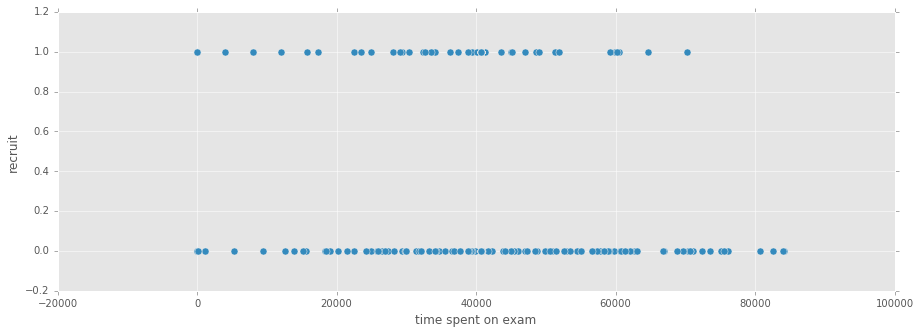

In [34]:
data.plot.scatter(x=17, y=12, figsize=(15,5), fontsize=10, s=50)
plt.ylabel(features[12])
plt.xlabel(features[17])
print(names['12'])

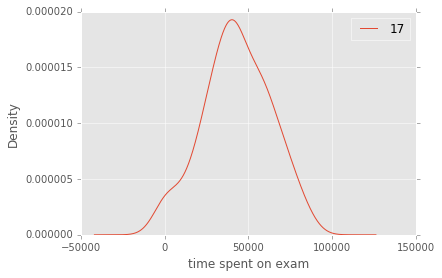

In [35]:
data.loc[data[12] == 0].plot.kde(y=17)
plt.xlabel(features[17])

### Dependence of features from each other:

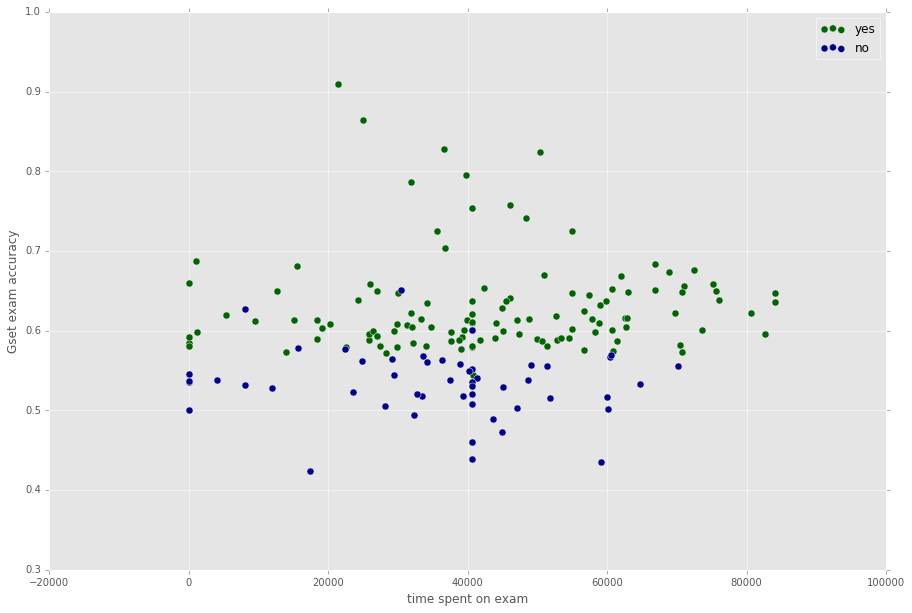

In [36]:
ax = data.loc[data[12] == 0][[17,13]].plot.scatter(x=17, y=13, figsize=(15,10), fontsize=10, 
                                                   s=50, color='DarkGreen', label='yes')
data.loc[data[12] == 1][[17,13]].plot.scatter(x=17, y=13, figsize=(15,10), fontsize=10, 
                                              s=50, color='DarkBlue', label='no', ax=ax)
plt.ylabel(features[13])
plt.xlabel(features[17])

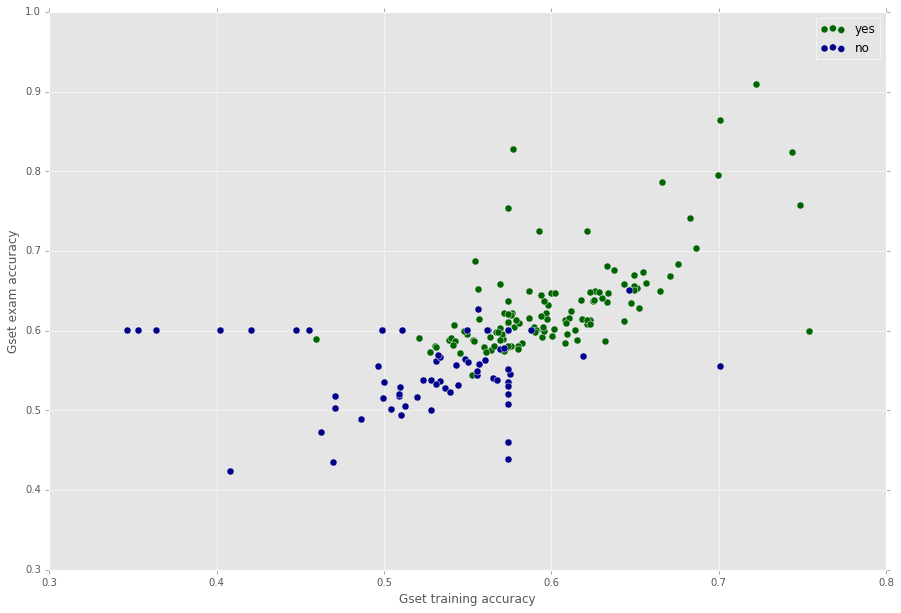

In [37]:
ax = data.loc[data[12] == 0][[15,13]].plot.scatter(x=15, y=13, figsize=(15,10), fontsize=10, 
                                                   s=50, color='DarkGreen', label='yes')
data.loc[data[12] == 1][[15,13]].plot.scatter(x=15, y=13, figsize=(15,10), fontsize=10, 
                                              s=50, color='DarkBlue', label='no', ax=ax)
plt.ylabel(features[13])
plt.xlabel(features[15])

{0: 'высш', 1: 'спец', 2: 'сред', 3: 'степень', 4: 'студент'}


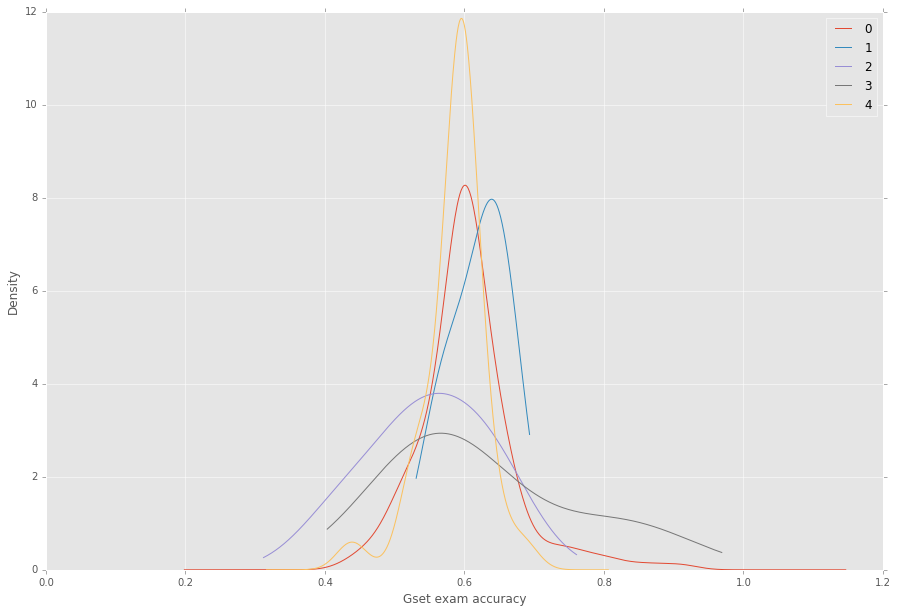

In [40]:
for i in range(5):
    data.loc[data[6] == i][13].plot(kind='kde', legend=True,figsize=(15,10), fontsize=10)
L=plt.legend()
for i in range(5):   
    L.get_texts()[i].set_text(str(i))
plt.xlabel(features[13])
print(names['6'])

{0: 'ж', 1: 'м'}


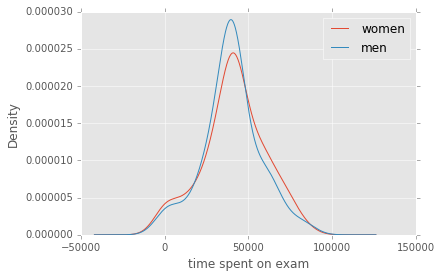

In [41]:
data.loc[data[4] == 0][17].plot(kind='kde', legend=True)
data.loc[data[4] == 1][17].plot(kind='kde', legend=True)
L=plt.legend()
L.get_texts()[0].set_text('women')
L.get_texts()[1].set_text('men')
plt.xlabel(features[17])
print(names['4'])

open questions
{0: 'плохие', 1: 'средние', 2: 'хорошие'}


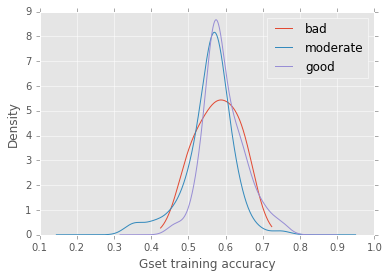

In [42]:
data.loc[data[2] == 0][15].plot(kind='kde', legend=True)
data.loc[data[2] == 1][15].plot(kind='kde', legend=True)
data.loc[data[2] == 2][15].plot(kind='kde', legend=True)
L=plt.legend()
L.get_texts()[0].set_text('bad')
L.get_texts()[1].set_text('moderate')
L.get_texts()[2].set_text('good')
plt.xlabel(features[15])
print(features[2])
print(names['2'])

open questions
{0: 'плохие', 1: 'средние', 2: 'хорошие'}


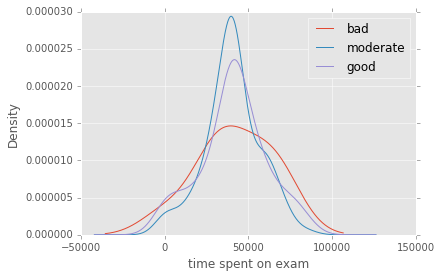

In [47]:
data.loc[data[2] == 0][17].plot(kind='kde', legend=True)
data.loc[data[2] == 1][17].plot(kind='kde', legend=True)
data.loc[data[2] == 2][17].plot(kind='kde', legend=True)
L=plt.legend()
L.get_texts()[0].set_text('bad')
L.get_texts()[1].set_text('moderate')
L.get_texts()[2].set_text('good')
plt.xlabel(features[17])
print(features[2])
print(names['2'])